In [3]:
import tensorflow_datasets as tfds

ds, info = tfds.load("reddit", split="train", with_info=True, data_dir="~/shared/ml/tensorflow")

# Take the first five rows
first_five_rows = ds.take(5)

# Iterate over the first five rows and print them
for row in first_five_rows:
    print(row)

{'author': <tf.Tensor: shape=(), dtype=string, numpy=b'huh7'>, 'body': <tf.Tensor: shape=(), dtype=string, numpy=b"I  was talking to this girl I've met today, and I'm not so sure what happened. It was nice seeing her after almost 3 weeks last talking with her, and she seems like a cool person to hang out with. I realized however, that I want to try to be good friends with her. We walked around and talked a while, and before I knew what happened I asked and she gave me her digits. \n\nWe proceeded to text each other back and forth about lots of bullshit, and I suddenly asked myself; is this emotionally cheating? To be honest, I do feel as if I did. \n\nI understand I (19M)am in a monogamous relationship with my gf(17), and I want communication between us to be crystal clear. I feel guilty, and an obligation to tell her of what I did. Should I tell my gf about this, or stop myself in the future before something like this happens again? I am emotionally confused right now, and could use s

In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
from pyspark.sql.types import *
import pandas as pd
from pymongo import MongoClient

conf = SparkConf().set("spark.jars.packages", "com.linkedin.sparktfrecord:spark-tfrecord_2.12:0.6.0")
sc = SparkContext(conf=conf)
spark = SparkSession(sc)
print(f'The PySpark {spark.version} version is running...')

:: loading settings :: url = jar:file:/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/jovyan/.ivy2/cache
The jars for the packages stored in: /home/jovyan/.ivy2/jars
com.linkedin.sparktfrecord#spark-tfrecord_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-13f56771-c748-4273-81e8-f6231c90085d;1.0
	confs: [default]
	found com.linkedin.sparktfrecord#spark-tfrecord_2.12;0.6.0 in central
:: resolution report :: resolve 481ms :: artifacts dl 18ms
	:: modules in use:
	com.linkedin.sparktfrecord#spark-tfrecord_2.12;0.6.0 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   1   |   0   |   0   |   0   ||   1   |   0   |
	---------------------------------------------------------------------
:: retrieving :: org.apache.spark#spar

The PySpark 3.5.0 version is running...


In [2]:
# Directory containing TFRecord files and the JSON file
tfrecord_dir = "shared/ml/tensorflow/reddit/1.0.0/*"

reddit_data = spark.read.format("tfrecord") \
    .option("recordType", "Example") \
    .option("pathGlobFilter", "*.tfrecord-*") \
    .load(tfrecord_dir)


reddit_data.show(3)

+--------------------+------------+---------------+--------------------+--------------------+--------------------+------------+-------+
|      normalizedBody|subreddit_id|      subreddit|             summary|                body|             content|      author|     id|
+--------------------+------------+---------------+--------------------+--------------------+--------------------+------------+-------+
|I did. It was one...|    t5_2qh1i|      AskReddit|I cheated with a ...|I did. It was one...|I did. It was one...|RandomGuy0-2|ceb578v|
|My son was 3 when...|    t5_2qh1i|      AskReddit|kids who cannot s...|My son was 3 when...|My son was 3 when...|      Logun0|cart4tc|
|Okay, so I take s...|    t5_2tkk8|OpiatesRecovery|Opiates give a po...|Okay, so I take s...|Okay, so I take s...|  seestraw89|c7hsue4|
+--------------------+------------+---------------+--------------------+--------------------+--------------------+------------+-------+
only showing top 3 rows



In [ ]:
client = MongoClient('mongo-csgy-6513-fall.db',
                      username='vv2265',
                      password="vv2265",
                      authSource = "vv2265_db")
client 

# EXPLORATORY DATA ANALYSIS
### First we do Exploratory Data Analysis to better understand the trends in the underlying data.

### The below code cell prints the total number of data points in our reddit data. We see that we have almost 4 million rows in our dataset.

In [10]:
reddit_data.count()

3848330

### Next, we print the count of posts in each subreddit. We see that the subreddit 'AskReddit' has the maximum number of posts.

In [4]:
# Getting number of texts per subreddit
summary_per_subreddit = reddit_data.groupby("subreddit").count().orderBy(col('count').desc())
summary_per_subreddit.show()

+-------------------+------+
|          subreddit| count|
+-------------------+------+
|          AskReddit|589947|
|      relationships|352049|
|    leagueoflegends|109307|
|               tifu| 52219|
|relationship_advice| 50416|
|              trees| 47286|
|             gaming| 43851|
|            atheism| 43268|
|      AdviceAnimals| 40783|
|              funny| 40171|
|           politics| 36518|
|               pics| 35098|
|                sex| 28806|
|                WTF| 25781|
|  explainlikeimfive| 25482|
|      todayilearned| 25004|
|            Fitness| 22694|
|               IAmA| 22689|
|          worldnews| 22577|
|              DotA2| 22405|
+-------------------+------+
only showing top 20 rows



### In order to visualize better let's plot a barchart showing the average post length of posts in each subreddit.

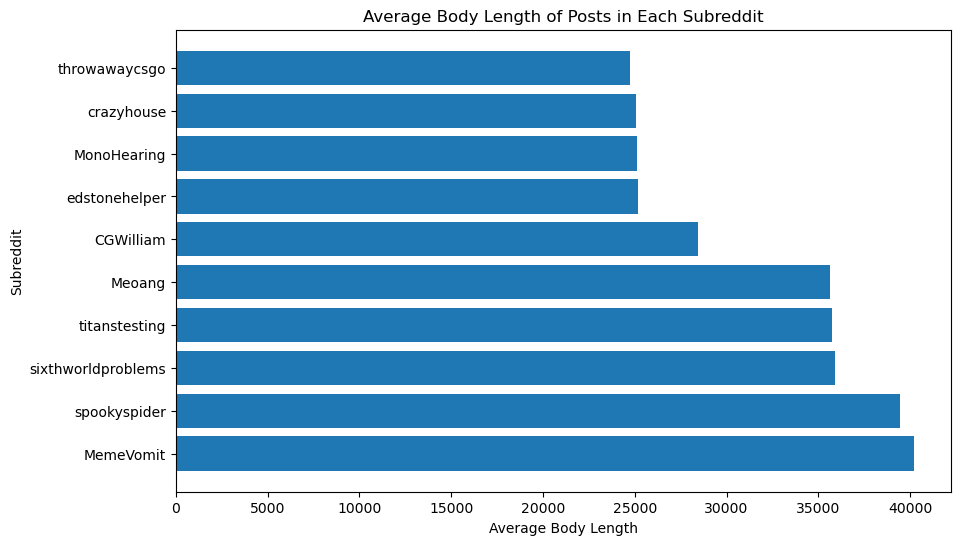

In [5]:
# Text Length Analysis
reddit_data = reddit_data.withColumn('body_length', length(reddit_data['body']))

avg_body_length = reddit_data.select(['subreddit', 'body_length']) \
                             .groupBy('subreddit') \
                             .avg('body_length') \
                             .withColumnRenamed('avg(body_length)', 'average_body_length')

# Sorting the results in descending order of average body length
avg_body_length_sorted = avg_body_length.orderBy(col('average_body_length').desc())

# Showing the results
avg_body_length_sorted_pd = avg_body_length_sorted.limit(10).toPandas()

avg_body_length_sorted_to_save = avg_body_length_sorted_pd.to_dict('records')

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating a horizontal bar plot
plt.barh(avg_body_length_sorted_pd['subreddit'], avg_body_length_sorted_pd['average_body_length'])

# Adding titles and labels
plt.xlabel('Average Post Length')
plt.ylabel('Subreddit')
plt.title('Average Post Length of Posts in Each Subreddit')

# Display the plot
plt.show()

### Let's plot a barchart showing the Top 10 Authors by Number of Posts.
* Note: We notice that '[deleted]' has the most number of posts, which means most users have deleted their usernames. So while plotting the barplot we ignore that for better visualization.

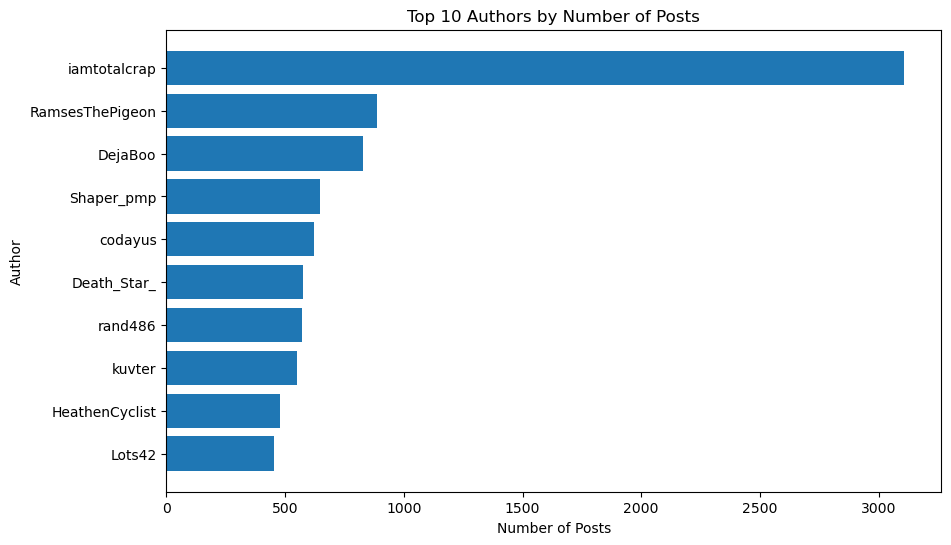

In [9]:
# Top Authors
top_authors = reddit_data.groupBy('author').count().orderBy('count', ascending=False)

# Convert the result to a Pandas DataFrame
top_authors_pd = top_authors.limit(11).toPandas()

# Skip the first data point because it's "[deleted]"
top_authors_pd = top_authors_pd.iloc[1:]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_authors_pd['author'], top_authors_pd['count'])

# Invert y-axis to have the author with the most posts on top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Number of Posts')
plt.ylabel('Author')
plt.title('Top 10 Authors by Number of Posts')

# Display the plot
plt.show()

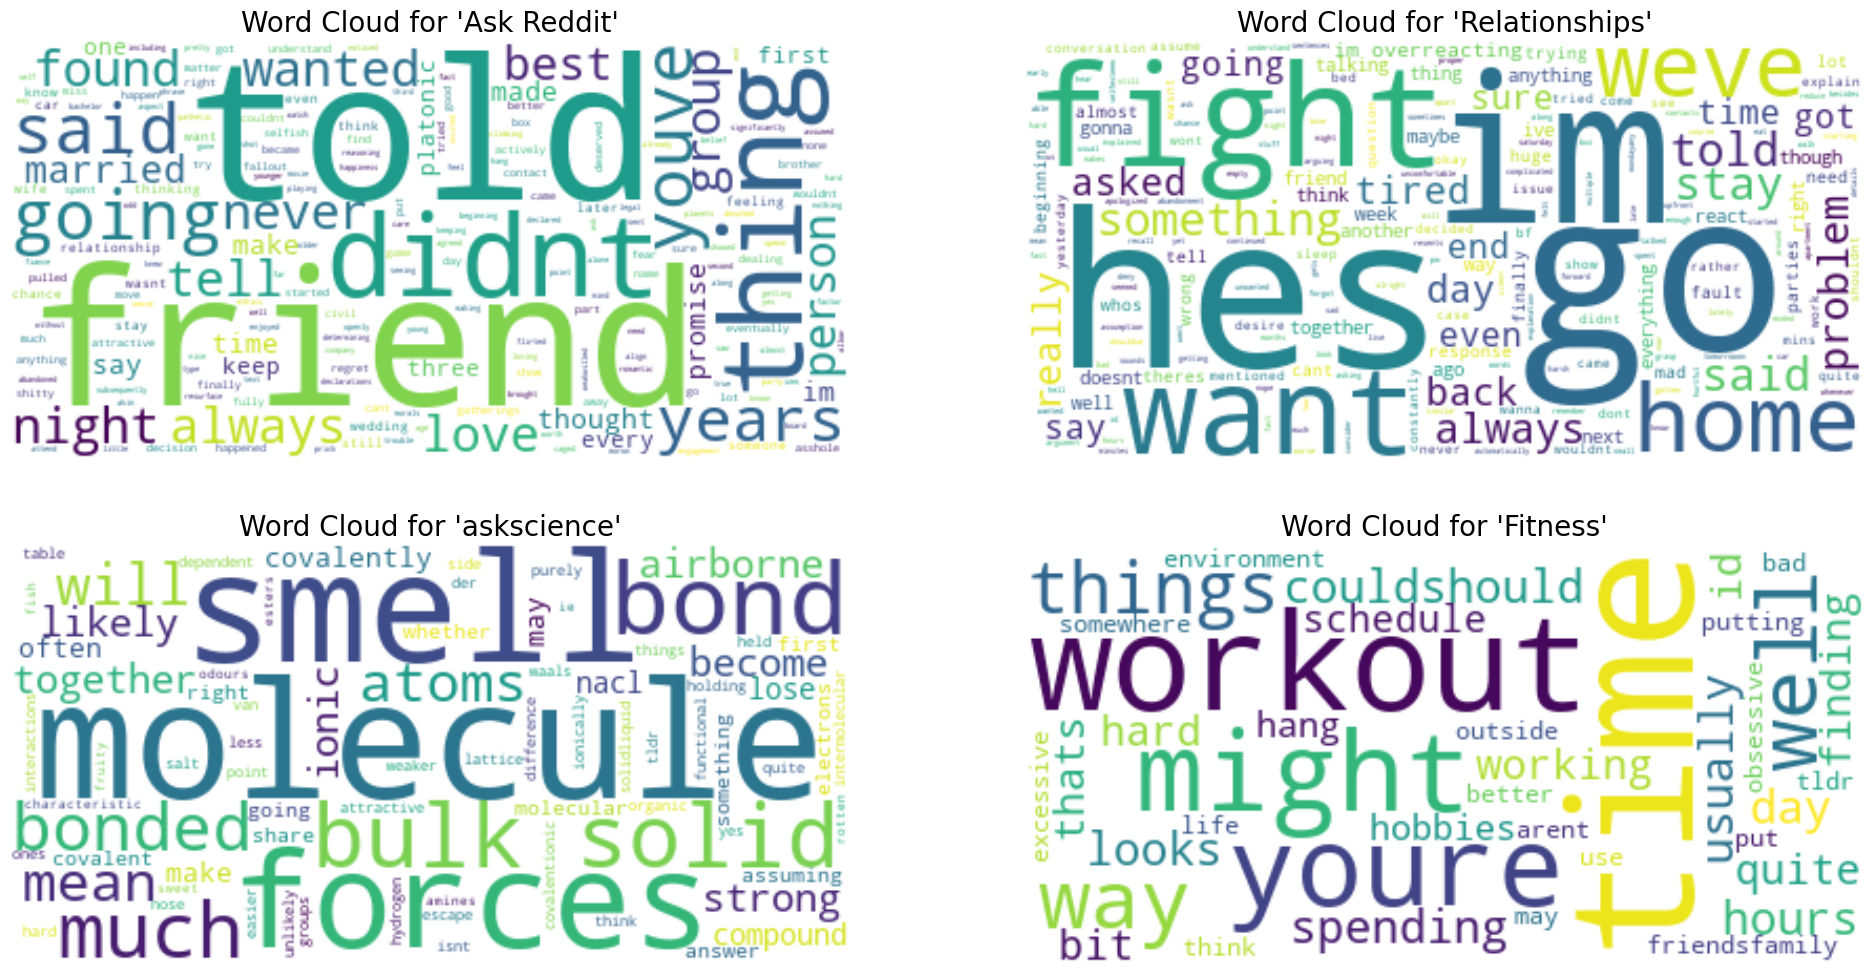

In [6]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from wordcloud import WordCloud

# Filter data for 'AskReddit' and 'relationships' subreddits
askreddit_data = reddit_data.filter(col('subreddit') == 'AskReddit').select('body')
relationships_data = reddit_data.filter(col('subreddit') == 'relationships').select('body')
askscience_data = reddit_data.filter(col('subreddit') == 'askscience').select('body')
fitness_data = reddit_data.filter(col('subreddit') == 'Fitness').select('body')

def preprocess_and_concat_text(reddit_data):
    # Existing preprocessing steps
    reddit_data = reddit_data.withColumn('body', lower(col('body')))
    reddit_data = reddit_data.withColumn('body', regexp_replace('body', "[^a-zA-Z\\s]", ""))
    tokenizer = Tokenizer(inputCol="body", outputCol="words")
    reddit_data = tokenizer.transform(reddit_data)
    remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
    reddit_data = remover.transform(reddit_data)

    # Concatenate all words into a single string per subreddit
    reddit_data = reddit_data.withColumn("concatenated_words", concat_ws(" ", "filtered_words"))

    return reddit_data

# Extract the concatenated words as a string
askreddit_words = preprocess_and_concat_text(askreddit_data).first()[0]
relationships_words = preprocess_and_concat_text(relationships_data).first()[0]
askscience_words = preprocess_and_concat_text(askscience_data).first()[0]
fitness_words = preprocess_and_concat_text(fitness_data).first()[0]

# Generate and plot word clouds
plt.figure(figsize=(24, 12))

# Word cloud for 'AskReddit'
plt.subplot(2, 2, 1)
ask_reddit_word_cloud = WordCloud(background_color='white').generate(askreddit_words)
plt.imshow(ask_reddit_word_cloud, interpolation='bilinear')
plt.title("Word Cloud for 'Ask Reddit'", fontsize=20)
plt.axis('off')

# Word cloud for 'relationships'
plt.subplot(2, 2, 2)
relationships_word_cloud = WordCloud(background_color='white').generate(relationships_words)
plt.imshow(relationships_word_cloud, interpolation='bilinear')
plt.title("Word Cloud for 'Relationships'", fontsize=20)
plt.axis('off')

# Word cloud for 'askscience'
plt.subplot(2, 2, 3)
askscience_cloud = WordCloud(background_color='white').generate(askscience_words)
plt.imshow(askscience_cloud, interpolation='bilinear')
plt.title("Word Cloud for 'askscience'", fontsize=20)
plt.axis('off')

# Word cloud for 'fitness'
plt.subplot(2, 2, 4)
fitness_word_cloud = WordCloud(background_color='white').generate(fitness_words)
plt.imshow(fitness_word_cloud, interpolation='bilinear')
plt.title("Word Cloud for 'Fitness'", fontsize=20)
plt.axis('off')
plt.savefig('word_clouds.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [3]:
from textblob import TextBlob

# Define a Pandas UDF for sentiment analysis
@pandas_udf(DoubleType())
def sentiment_analysis_pandas_udf(content: pd.Series) -> pd.Series:
    return content.apply(lambda text: TextBlob(text).sentiment.polarity)

/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/pandas/serializers.py:224: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/pandas/serializers.py:224: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


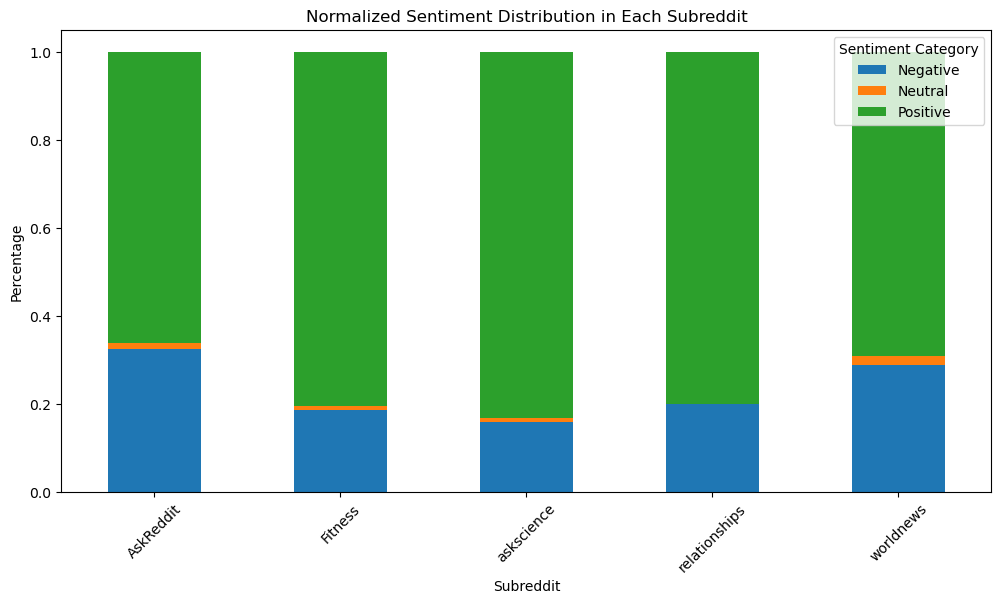

In [7]:
# Categorizing sentiment
# Filter for specific subreddits if needed
subreddits_of_interest = ['AskReddit', 'relationships', 'askscience', 'Fitness', 'worldnews']  # Add your subreddits of interest here
filtered_data = reddit_data.filter(col('subreddit').isin(subreddits_of_interest))

# Apply the Pandas UDF on the DataFrame
reddit_data_with_sentiment = filtered_data.withColumn('sentiment', sentiment_analysis_pandas_udf(col('body')))

reddit_data_with_sentiment = reddit_data_with_sentiment.withColumn(
    'sentiment_category',
    when(col('sentiment') < 0, 'Negative')
    .when(col('sentiment') == 0, 'Neutral')
    .otherwise('Positive')
)

# Group by subreddit and sentiment category
sentiment_category_counts = reddit_data_with_sentiment.groupBy('subreddit', 'sentiment_category').count()

sentiment_category_counts_pd = sentiment_category_counts.toPandas()

# Pivot the DataFrame to get subreddits as index and categories as columns
pivot_df = sentiment_category_counts_pd.pivot(index='subreddit', columns='sentiment_category', values='count')

# Normalizing the data
pivot_df_normalized = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Plotting the normalized data
pivot_df_normalized.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Normalized Sentiment Distribution in Each Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Percentage')
plt.legend(title='Sentiment Category')
plt.xticks(rotation=45)
plt.show()

In [9]:
summary_per_subreddit = reddit_data.groupby("subreddit").count().orderBy(col('count'))

# Filter for subreddits with more than 10 and less than 50 posts
filtered_summary = summary_per_subreddit.filter((col('count') > 90) & (col('count') < 100))

# Order by count in ascending order and show the results
filtered_summary.orderBy(col('count').asc()).show()


+-------------------+-----+
|          subreddit|count|
+-------------------+-----+
|          ZenHabits|   91|
|doublespeaklockstep|   91|
|     homeautomation|   91|
|     CompetitiveEDH|   91|
|                DnB|   91|
|    duelofchampions|   91|
|   photoshopbattles|   91|
|        WarshipPorn|   91|
|         NoContract|   91|
|        Militaryfaq|   91|
|       newhampshire|   91|
|            Unity2D|   91|
|             fitbit|   91|
|          foshelter|   91|
|           sousvide|   91|
|     infinitecrisis|   91|
|CasualPokemonTrades|   92|
|           The_Crew|   92|
|            POLITIC|   92|
|  ForeverAloneWomen|   92|
+-------------------+-----+
only showing top 20 rows



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Total batches to process: 12


Processed 1/12 batches


Processed 2/12 batches


Processed 3/12 batches


Processed 4/12 batches


Processed 5/12 batches


Processed 6/12 batches


Processed 7/12 batches


Processed 8/12 batches


Processed 9/12 batches


Processed 10/12 batches


Processed 11/12 batches


Processed 12/12 batches


/opt/conda/envs/bigdata/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


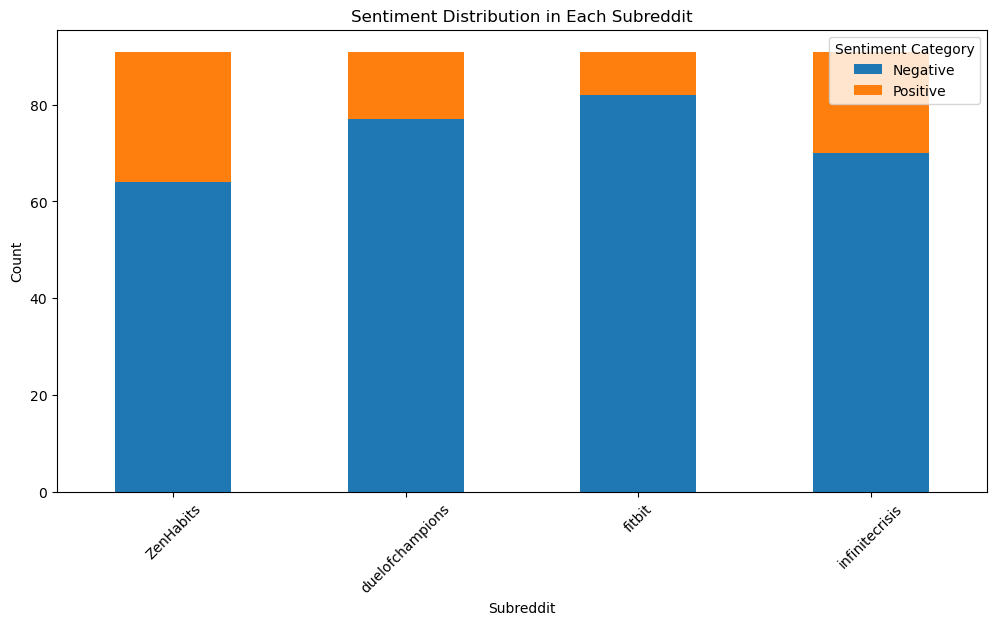

In [13]:
from transformers import pipeline, DistilBertTokenizer
import tensorflow as tf

# Load the pre-trained BERT sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Define a function to apply the BERT model
def apply_bert_sentiment(texts, batch_size=32):
    sentiments = []
    n = len(texts)
    total_batches = (n + batch_size - 1) // batch_size  # Calculate total number of batches
    print(f"Total batches to process: {total_batches}")

    # Process texts in batches
    for start_index in range(0, n, batch_size):
        end_index = start_index + batch_size
        batch_texts = texts[start_index:end_index]

        # Batch tokenization
        inputs = tokenizer(batch_texts, return_tensors="tf", truncation=True, padding=True, max_length=512)

        # Batch prediction
        predictions = sentiment_pipeline.model(**inputs)
        sentiment_label_ids = tf.argmax(predictions.logits, axis=-1).numpy()

        # Convert ids to sentiments
        batch_sentiments = ["POSITIVE" if label_id == 1 else "NEGATIVE" for label_id in sentiment_label_ids]
        sentiments.extend(batch_sentiments)

        # Print progress after each batch
        processed_batches = (start_index // batch_size) + 1
        print(f"Processed {processed_batches}/{total_batches} batches")

    return sentiments


# Assuming 'reddit_data' is your Spark DataFrame
# Filter for specific subreddits
subreddits_of_interest = ['infinitecrisis', 'duelofchampions', 'fitbit', 'ZenHabits']
filtered_data = reddit_data.filter(col('subreddit').isin(subreddits_of_interest))

# Convert to Pandas DataFrame for processing
filtered_data_pd = filtered_data.select('subreddit', 'body').toPandas()

# Apply BERT sentiment analysis
sentiments = apply_bert_sentiment(filtered_data_pd['body'].tolist(), batch_size=32)

# Add sentiments to DataFrame
filtered_data_pd['sentiment'] = sentiments

# Add sentiments to DataFrame
filtered_data_pd['sentiment'] = sentiments

# Categorizing sentiment
filtered_data_pd['sentiment_category'] = filtered_data_pd['sentiment'].map({
    'POSITIVE': 'Positive',
    'NEGATIVE': 'Negative'
})

# Convert back to Spark DataFrame if needed
spark_df_with_sentiment = spark.createDataFrame(filtered_data_pd)

# Group by subreddit and sentiment category
sentiment_category_counts = spark_df_with_sentiment.groupBy('subreddit', 'sentiment_category').count()

# Convert to Pandas for plotting
sentiment_category_counts_pd = sentiment_category_counts.toPandas()

# Pivot the DataFrame
pivot_df = sentiment_category_counts_pd.pivot(index='subreddit', columns='sentiment_category', values='count')

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution in Each Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.legend(title='Sentiment Category')
plt.xticks(rotation=45)
plt.show()